In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
import os
import math
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')


/home/guts/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
path = "/home/guts/Documents/accel_data/acceleration_data.csv"
df = pd.read_csv(path)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'] = df['Timestamp'].dt.floor('s')
df

,Timestamp,Acceleration
0,2024-08-09 14:23:41,10.110164
1,2024-08-09 14:23:42,9.555678
2,2024-08-09 14:23:44,9.325334
3,2024-08-09 14:23:48,9.532025
4,2024-08-09 14:23:49,9.468498
...,...,...
18662,2024-08-10 01:05:10,9.490646
18663,2024-08-10 01:05:13,10.447052
18664,2024-08-10 01:05:15,9.073947
18665,2024-08-10 01:05:16,10.054511


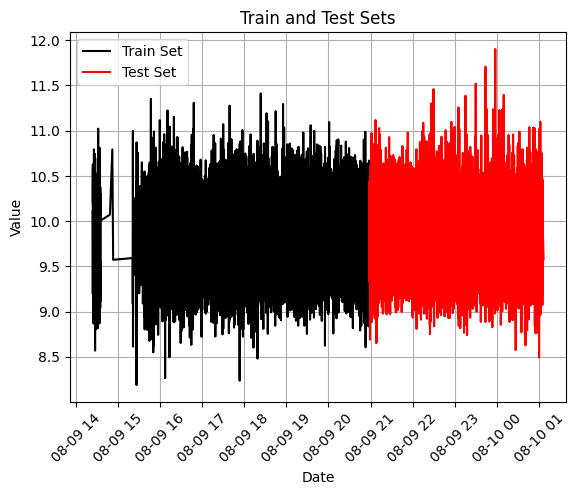

In [3]:
split = int(0.6 * len(df))
# Split the data using the split timestamp
train =df[0:split]
test =df[split:]

# Plotting

plt.plot(train['Timestamp'], train['Acceleration'], color="black", label="Train Set")
plt.plot(test['Timestamp'], test['Acceleration'], color="red", label="Test Set")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Train and Test Sets")
plt.legend()
plt.grid(True)

# Improve date formatting
plt.xticks(rotation=45)

plt.show()

In [4]:
# Check if 'Acceleration' column contains non-numeric data
if df['Acceleration'].dtype != 'float64':
    # Convert 'Acceleration' column to float64
    df['Acceleration'] = df['Acceleration'].astype('float64')

# Walk-forward validation
model = ARIMA(df['Acceleration'], order=(5, 2, 2))
model_fit = model.fit()

0         0.000000
1        15.165245
2         9.001199
3         8.890047
4         9.161010
           ...    
18662     9.644457
18663     9.601605
18664     9.760125
18665     9.589224
18666     9.667210
Name: predicted_mean, Length: 18667, dtype: float64


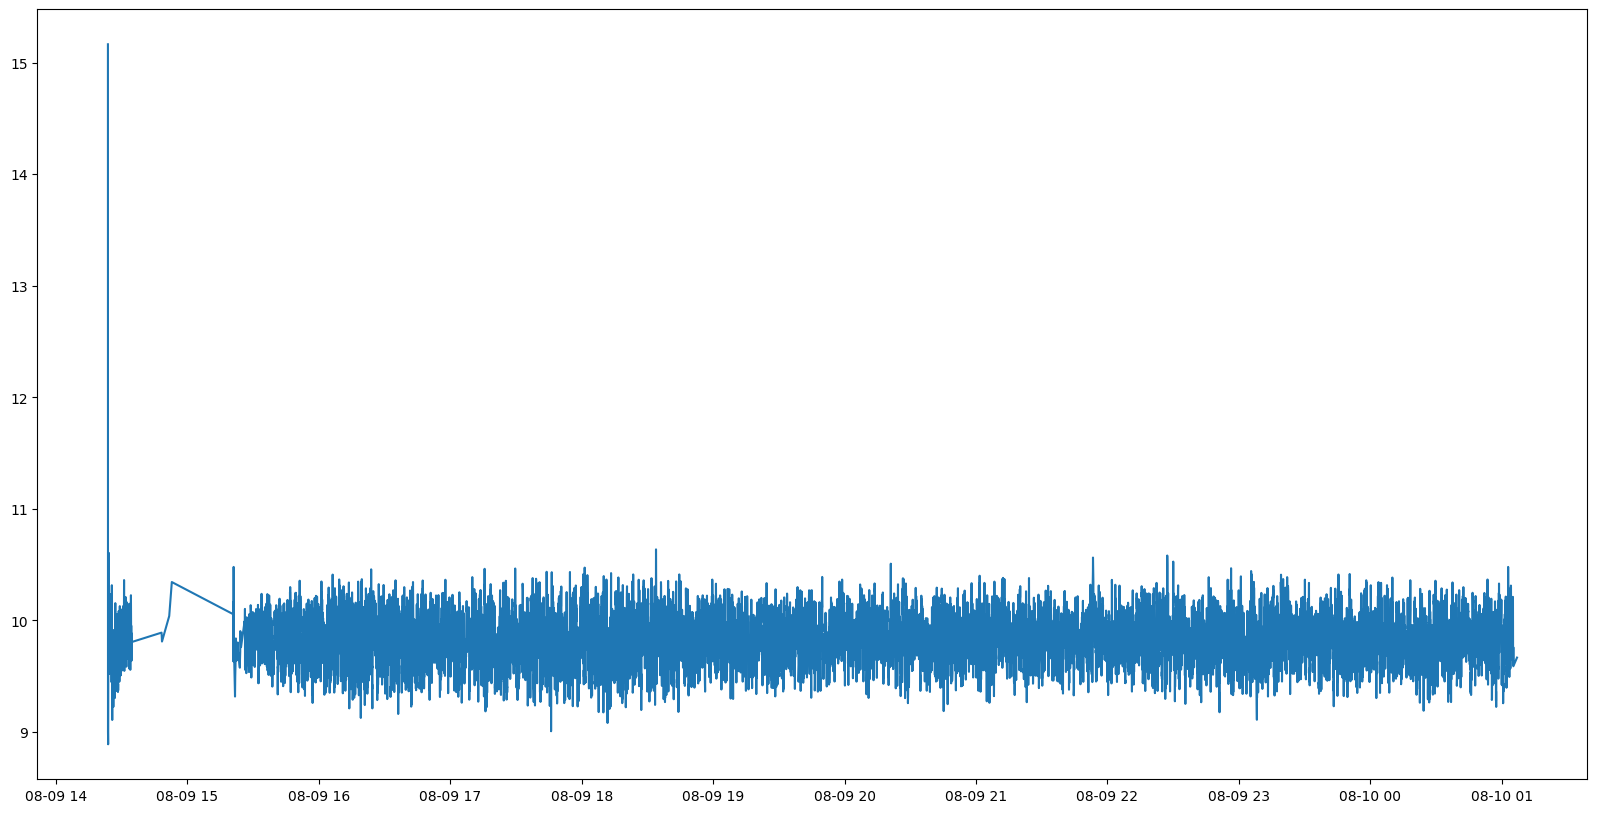

In [5]:

predictions = model_fit.predict()
print(predictions)
plt.figure(figsize=(20, 10))
plt.plot(df['Timestamp'][1:],predictions[1:])

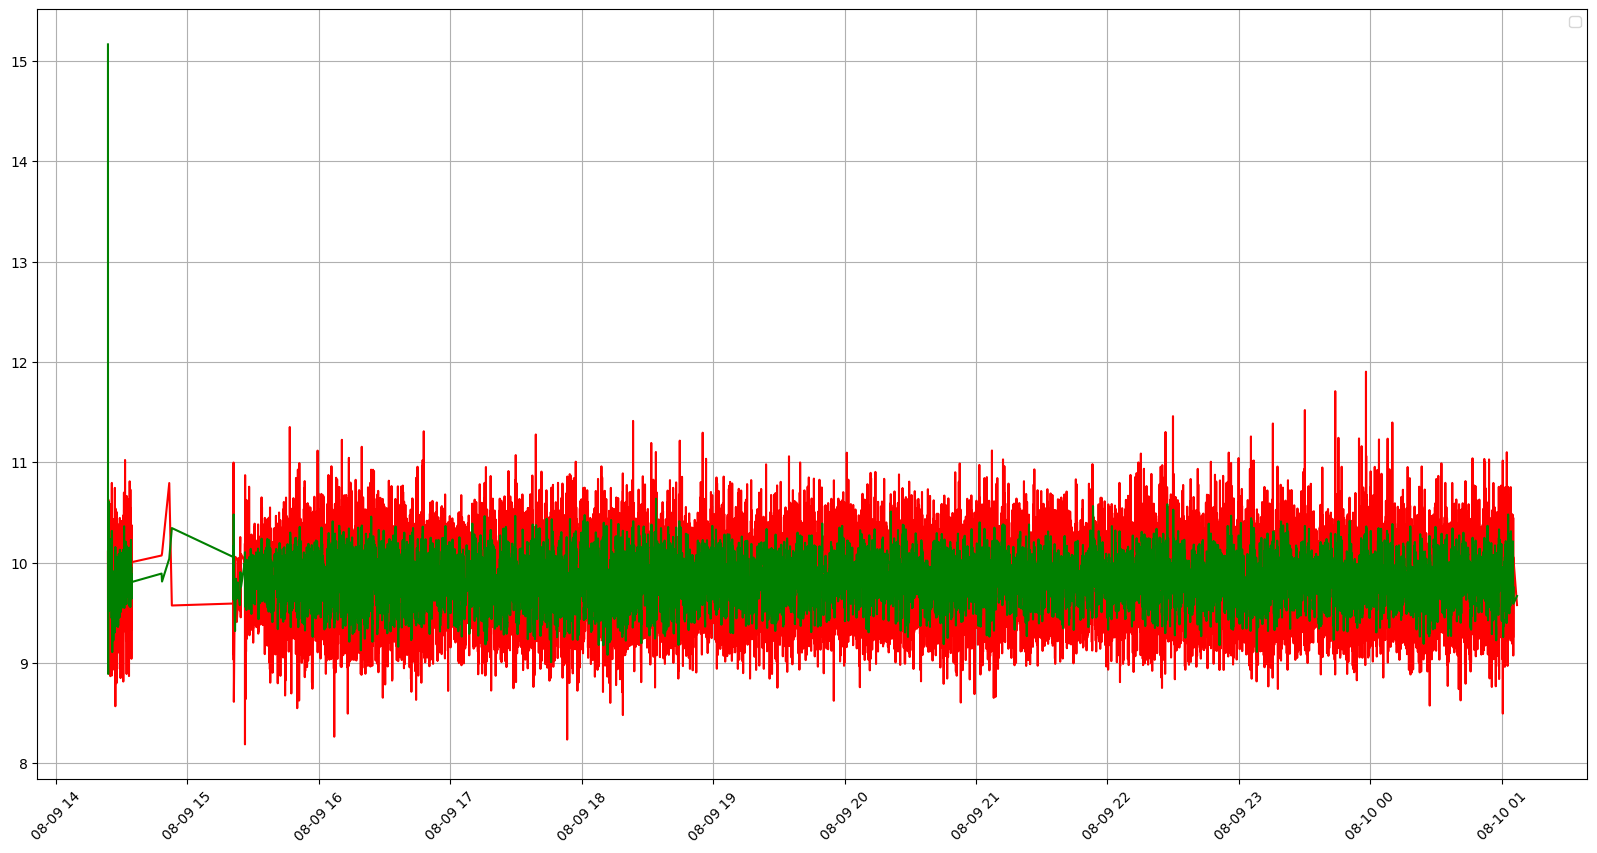

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(df['Timestamp'],df['Acceleration'], color = 'red')
plt.plot(df['Timestamp'][1:],predictions[1:], color='green')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [13]:
forecast_steps = 100
forecast = model_fit.forecast(steps=forecast_steps)

<Axes: xlabel='ds'>

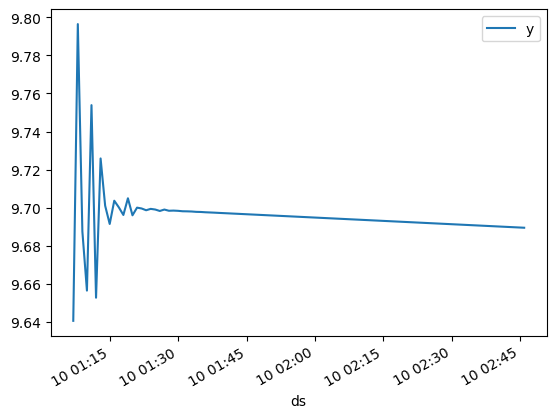

In [14]:
forecast_index = pd.date_range(start='2024-08-10 01:06:57', periods=forecast_steps, freq='min')
forecast_df = pd.DataFrame()
forecast_df['ds'] = forecast_index
forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])
forecast_df.index = pd.to_datetime(forecast_df.index)
forecast_df.set_index('ds', inplace=True)
forecast_df['y']= forecast.values
forecast_df.plot()

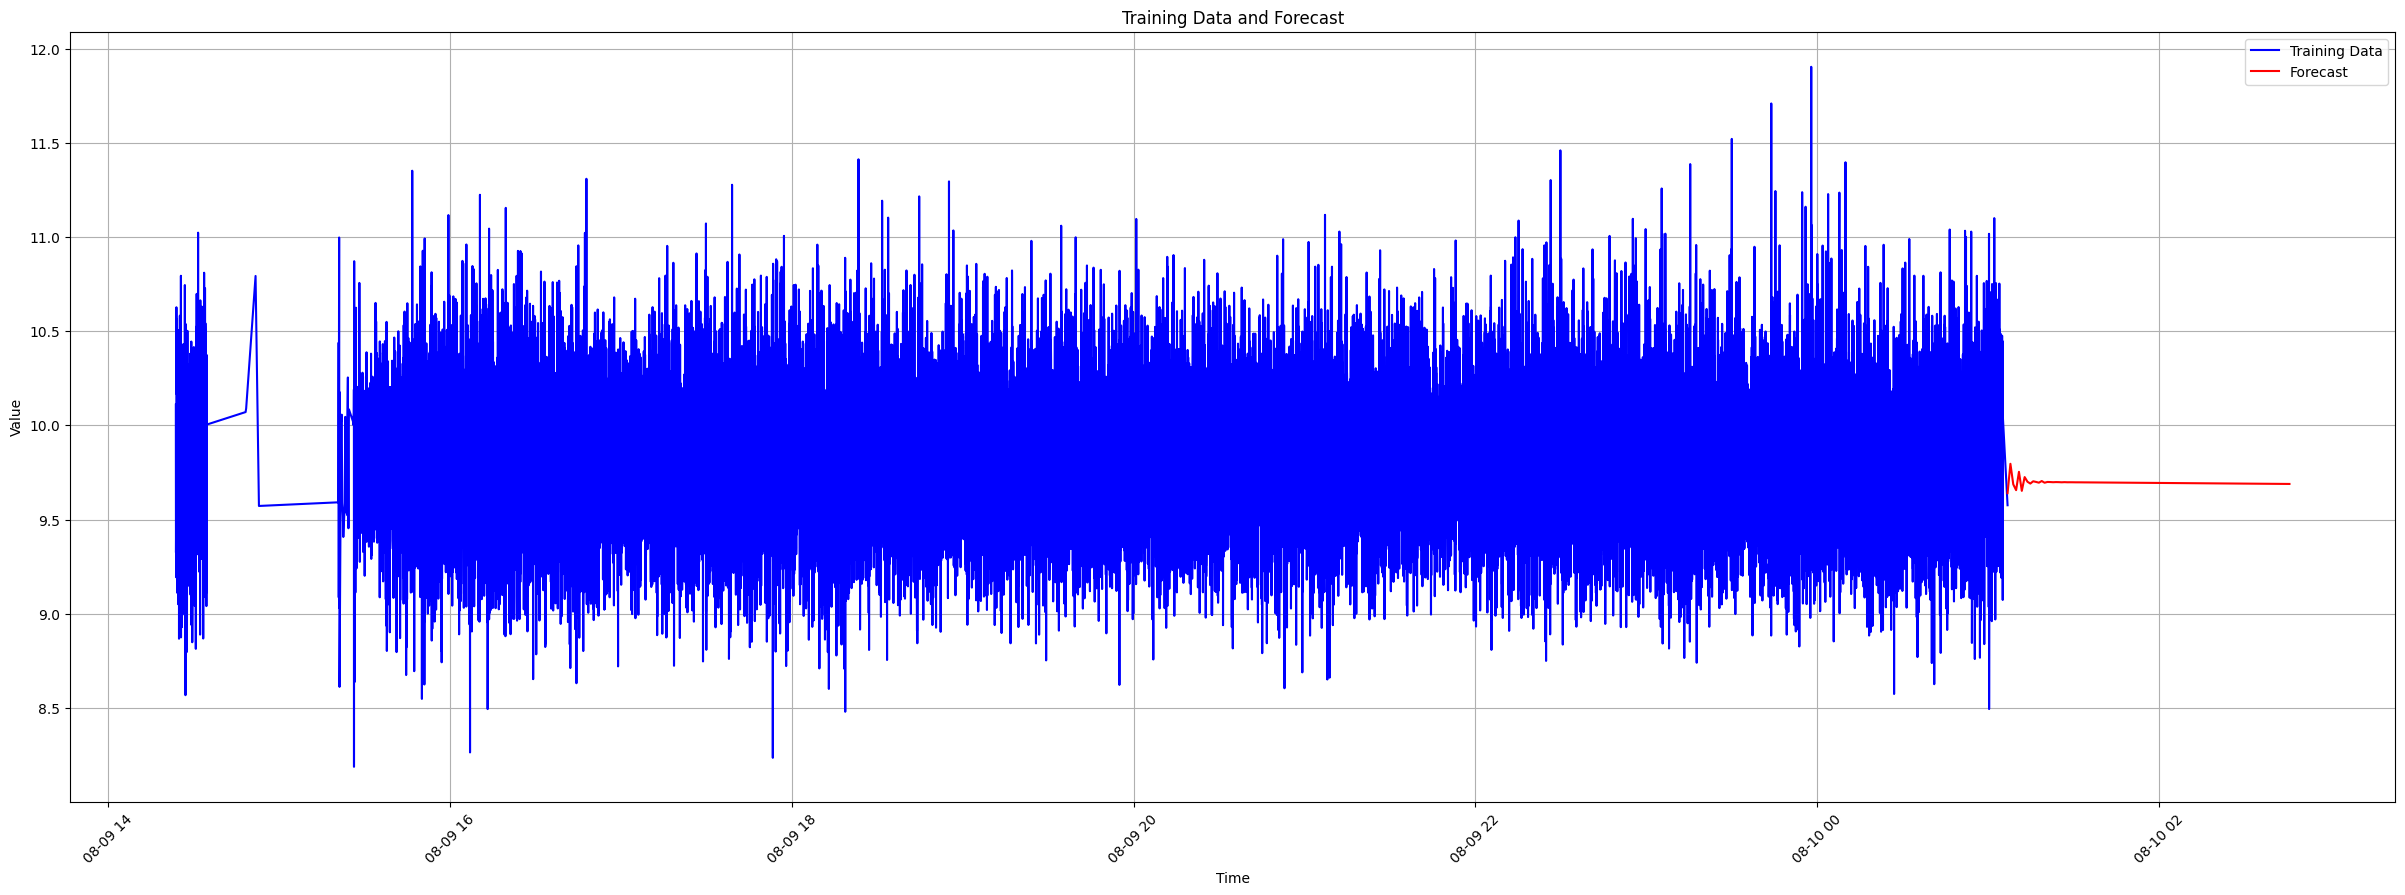

In [15]:
# Generate forecast dates
forecast_steps = 100
forecast_index = pd.date_range(start=df['Timestamp'].iloc[-1], periods=forecast_steps, freq='min')

# Create a new DataFrame for the forecast
forecast_df = pd.DataFrame()
forecast_df['ds'] = forecast_index
forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])
forecast_df.index = pd.to_datetime(forecast_df.index)
forecast_df.set_index('ds', inplace=True)

# Get the forecast values
forecast_df['y'] = forecast.values

plt.figure(figsize=(30, 10))
# Plotting the training data
plt.plot(df['Timestamp'], df['Acceleration'], label='Training Data', color='blue')

# Plotting the forecast data
plt.plot(forecast_df.index, forecast_df['y'], label='Forecast', color='red')

# Adding title and labels
plt.title('Training Data and Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Adding a legend to differentiate the lines
plt.legend()

# Optionally, you can also add gridlines for better readability
plt.grid(True)

# Show the plot
plt.show()